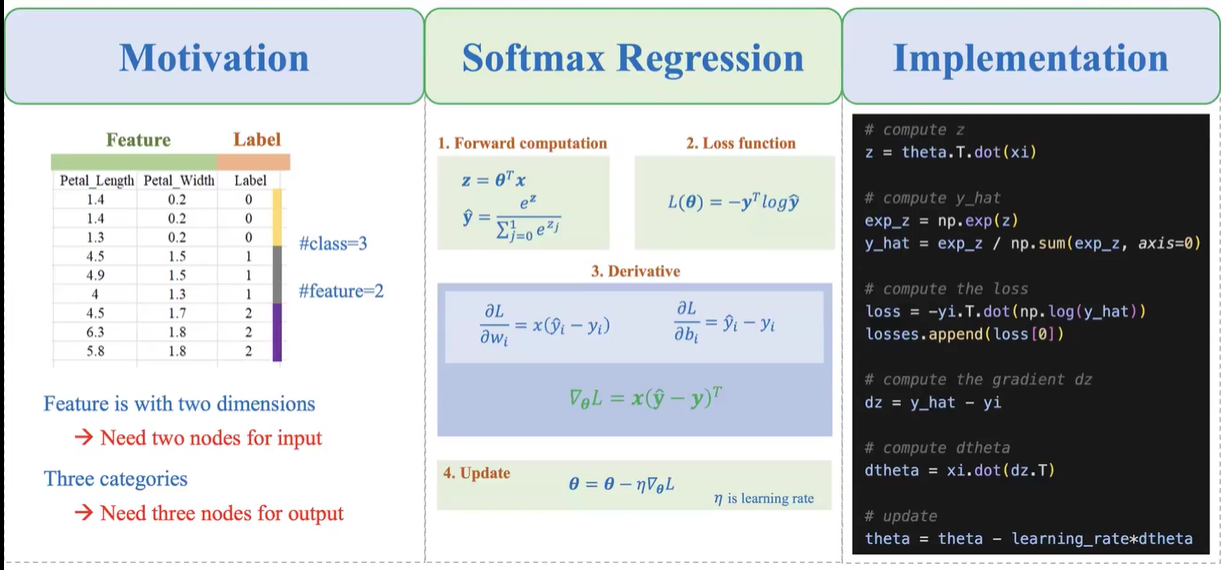

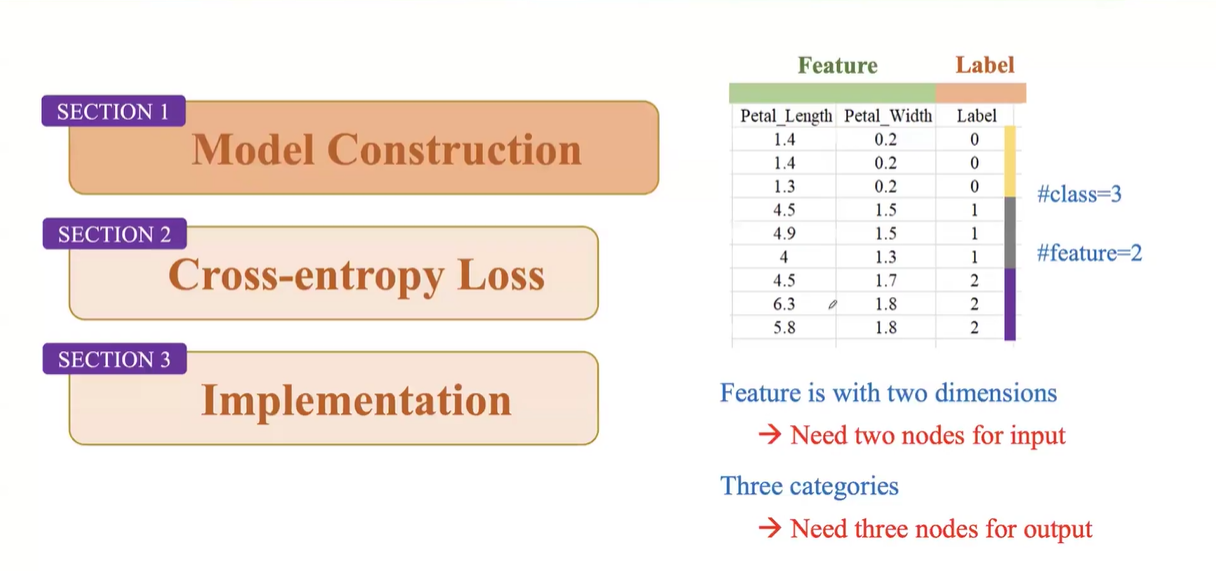

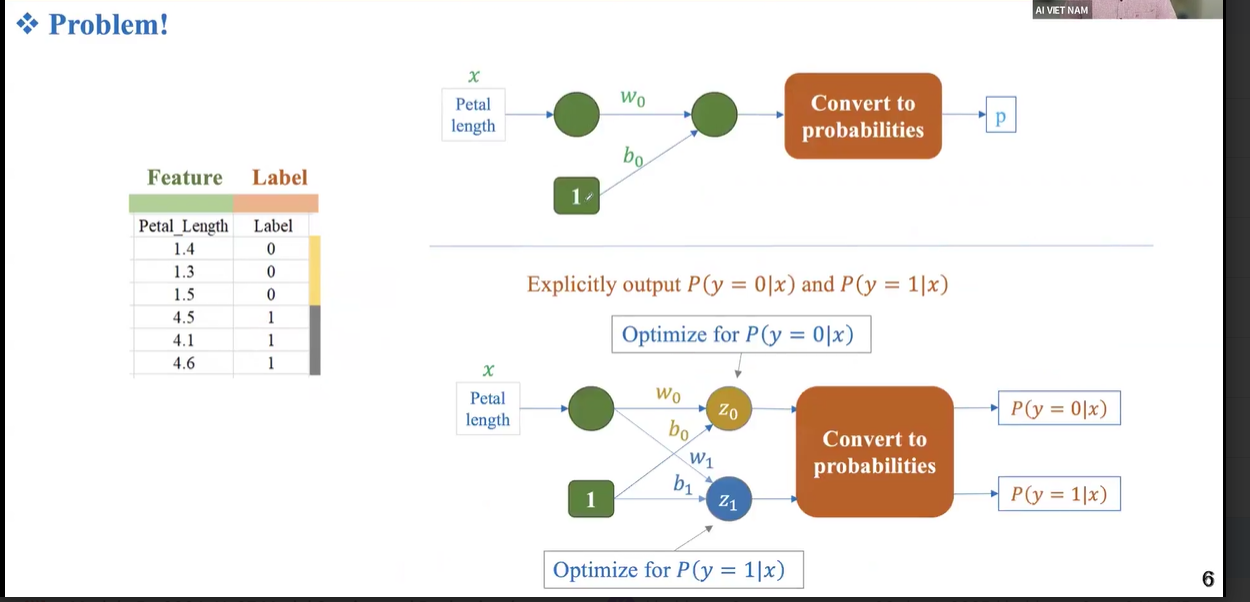

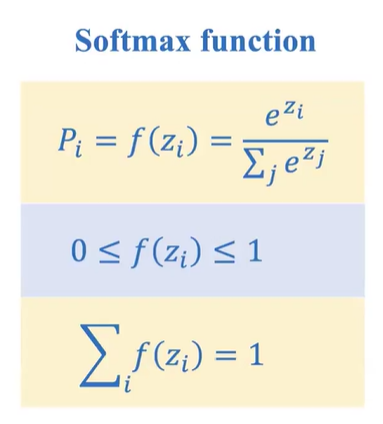

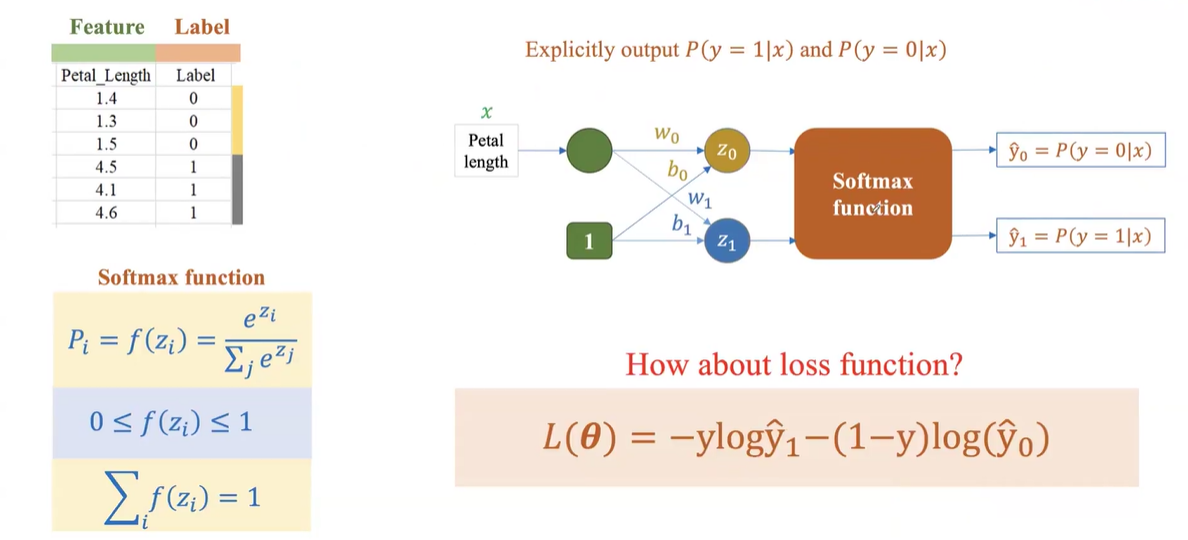

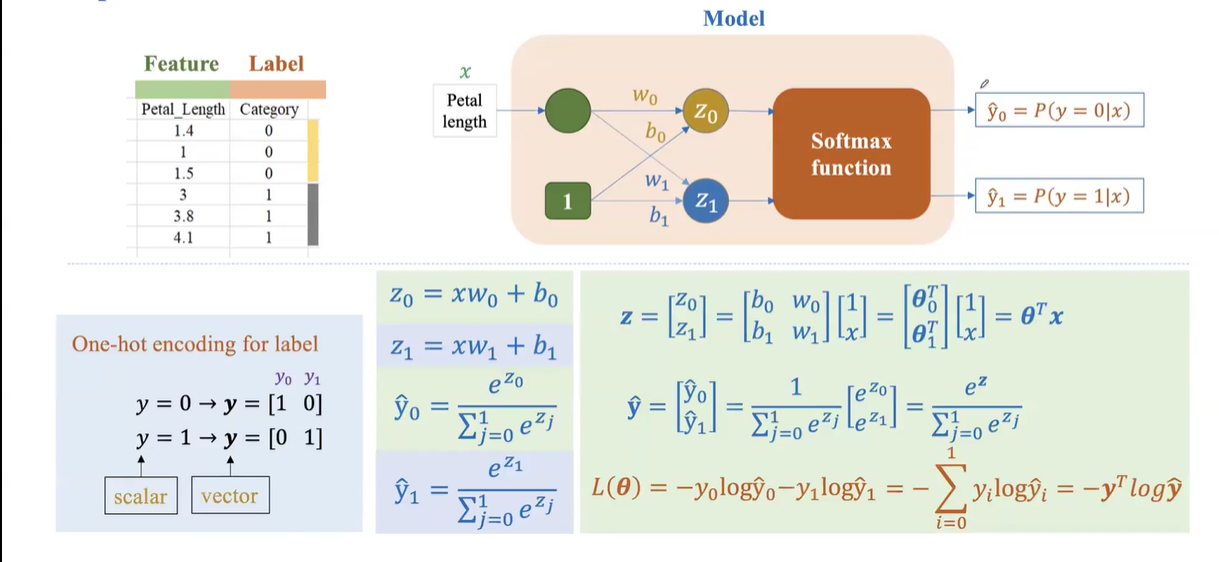

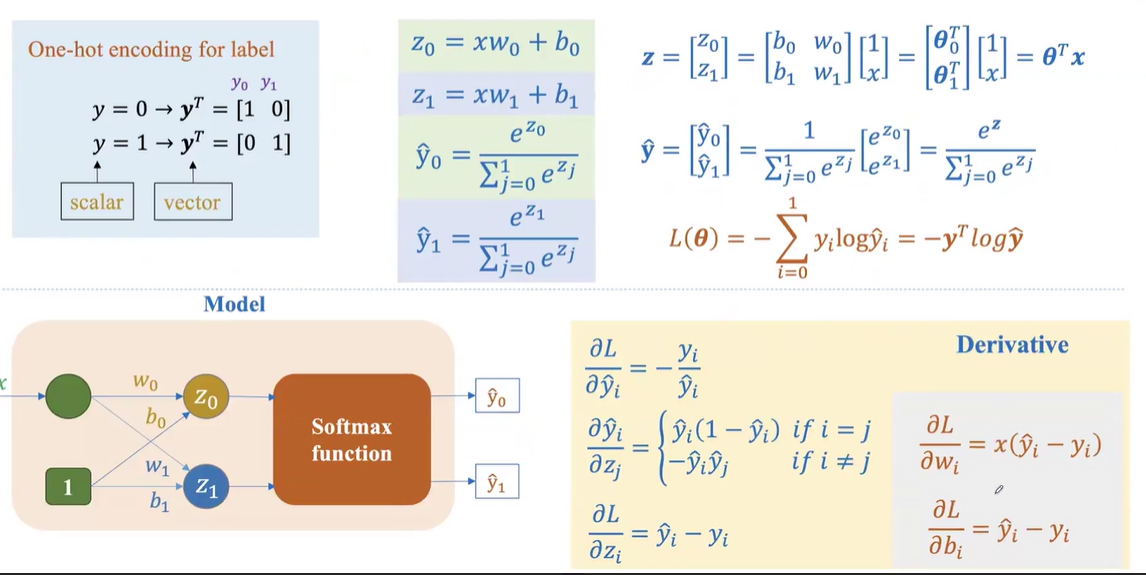

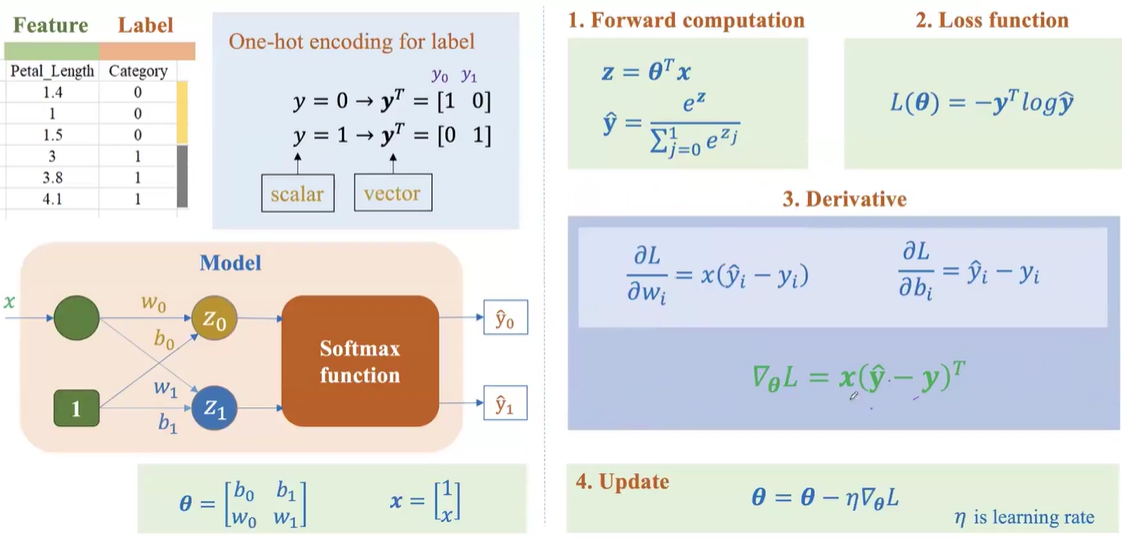

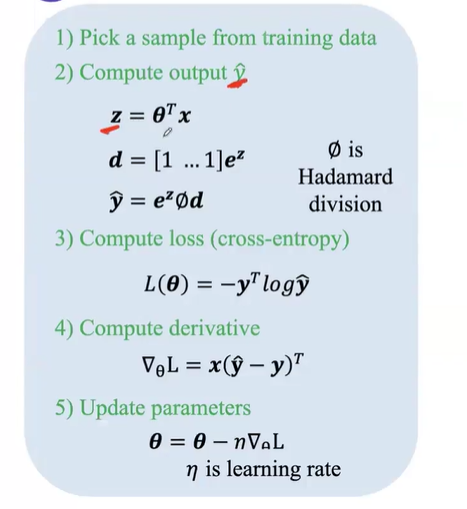

# One Sample

In [319]:

import numpy as np
import matplotlib.pyplot as plt

In [320]:
X = np.array([
    [0.5],
    [1.0],
    [1.5],
    [2.0],
    [2.5],
    [3.0],
    [3.5],
    [4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

In [321]:
#one-hot encoding
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

In [322]:
N = len(Y)
k = 2
N, k

(8, 2)

In [323]:
y_one_hot = convert_one_hot(Y, k)
y_one_hot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [324]:
X = np.hstack([np.ones((X.shape[0], 1)), X])
X

array([[1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 4. ]])

In [325]:
x = X[0].reshape((2,1))
y = y_one_hot[0].reshape((2,1))
x, y

(array([[1. ],
        [0.5]]),
 array([[1.],
        [0.]]))

In [326]:
#forward
def softmax_function(z):
    return np.exp(z) / np.sum(np.exp(z))

def predict(x, theta):
    z = theta.T.dot(x)
    y_hat = softmax_function(z)
    return y_hat

def loss_function(y_hat, y):
    loss = -np.log(y.T.dot(y_hat))
    return loss

def compute_gradient(X, y_hat, y):
    gradient = X.dot((y_hat - y).T)
    return gradient

def update_weights(gradient, theta, lr):
    theta = theta - gradient*lr
    return theta


In [327]:
theta = np.array([[0.1, 0.2],[0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [328]:
lr = 0.1
num_epoch = 20
N = X.shape[0]

In [329]:
losses = []
for epoch in range(num_epoch):
    for i in range(N):
        xi = X[i]
        yi = y_one_hot[i]
        xi = xi.reshape(2,1)
        yi = yi.reshape(2,1)

        #predict
        y_hat = predict(xi, theta)
        
        #compute loss
        loss = loss_function(y_hat, yi)
        losses.append(loss[0])

        #compute gradient
        gradient = compute_gradient(xi, y_hat, yi)

        #update weights
        theta = update_weights(gradient, theta, lr)

In [330]:
losses

[array([0.77095705]),
 array([0.71272059]),
 array([0.79426662]),
 array([0.80790032]),
 array([0.51583327]),
 array([1.41337302]),
 array([0.49379955]),
 array([0.16973291]),
 array([0.87628599]),
 array([0.93192863]),
 array([0.52609079]),
 array([1.22261262]),
 array([0.83573318]),
 array([1.03524525]),
 array([0.35762971]),
 array([0.13977177]),
 array([0.78840302]),
 array([0.86991109]),
 array([0.54695314]),
 array([1.22519101]),
 array([0.86361759]),
 array([0.98799042]),
 array([0.3349303]),
 array([0.13127083]),
 array([0.7034067]),
 array([0.8016139]),
 array([0.57910447]),
 array([1.20691492]),
 array([0.87368549]),
 array([0.95809143]),
 array([0.31851075]),
 array([0.12444917]),
 array([0.62954928]),
 array([0.74055535]),
 array([0.61080692]),
 array([1.18939559]),
 array([0.8827493]),
 array([0.93094804]),
 array([0.30393455]),
 array([0.11831464]),
 array([0.5657783]),
 array([0.68649161]),
 array([0.64139004]),
 array([1.17348387]),
 array([0.89160288]),
 array([0.90572

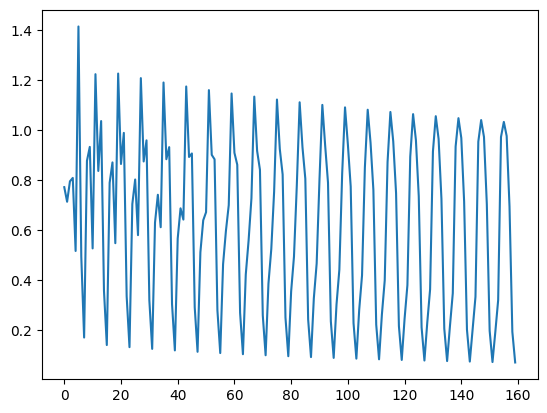

In [331]:
plt.plot(losses)
plt.show()

# Batch Sample 

In [332]:
X, y_one_hot

(array([[1. , 0.5],
        [1. , 1. ],
        [1. , 1.5],
        [1. , 2. ],
        [1. , 2.5],
        [1. , 3. ],
        [1. , 3.5],
        [1. , 4. ]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [333]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [334]:
X.shape

(8, 2)

In [335]:
#forward
def softmax_function(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def predict(x, theta):
    z = x.dot(theta)
    y_hat = softmax_function(z)
    return y_hat

def loss_function(y_hat, y):
    loss = -np.log(np.sum(y_hat*y, axis=1))
    return loss

def compute_gradient(X, y_hat, y):
    gradient = X.T.dot(y_hat - y)
    return gradient

def update_weights(gradient, theta, lr):
    theta = theta - gradient*lr
    return theta


In [336]:
theta = np.random.rand(2,2)
learning_rate = 0.01
n_epochs = 500
n_samples = X.shape[0]

losses = []
for epoch in range(n_epochs):
    # compute z, y_hat
    y_hat = predict(X, theta)

    # compute loss
    loss = loss_function(y_hat, y_one_hot)
    losses.append(np.sum(loss))

    # compute gradient
    gradient = compute_gradient(X, y_hat, y_one_hot)
    
    # update weight
    theta = update_weights(gradient, theta, learning_rate)
    

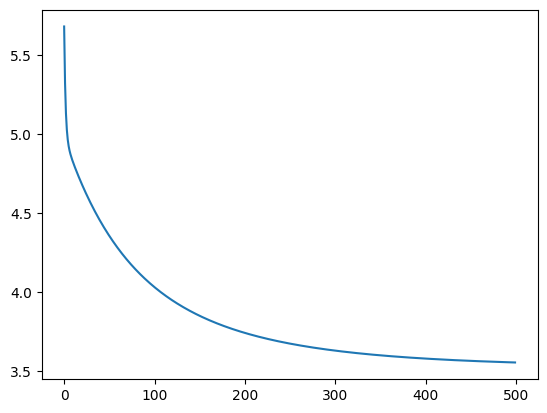

In [337]:
plt.plot(losses)
plt.show()